### Import libraries

In [2]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
from rasterio.plot import plotting_extent, show
import earthpy as et
import earthpy.plot as ep
import numpy as np
import ogr
from skimage import exposure
from skimage.segmentation import quickshift, slic
from osgeo import gdal
import time
from osgeo import gdal
import cv2


In [3]:
driverTiff = gdal.GetDriverByName('GTiff')

### Import satellite imagery

In [4]:
# Path to the satellite image file
sat_clipped = "Data/imagery_subset_cliped.tif"
dsm_clipped = "Data/DSM_cliped.tif"

In [5]:
sat_src = rio.open(sat_clipped)

r = sat_src.read(1)
g = sat_src.read(2)
b = sat_src.read(3)
nir = sat_src.read(4)

dsm_src = rio.open(dsm_clipped)
dsm = dsm_src.read(1)



In [6]:
# Path to the satellite image file
sat_clipped = "Data/imagery_subset_cliped.tif"
dsm_clipped = "Data/DSM_cliped.tif"
sat_src = rio.open(sat_clipped)

# Read the bands from the satellite image
r = sat_src.read(1)
g = sat_src.read(2)
b = sat_src.read(3)
nir = sat_src.read(4)

# Read the DSM (Digital Surface Model)
dsm_src = rio.open(dsm_clipped)
dsm = dsm_src.read(1)

# Stack all the bands and the DSM into a single array
stacked = np.stack([r, g, b, nir, dsm], axis=-1)

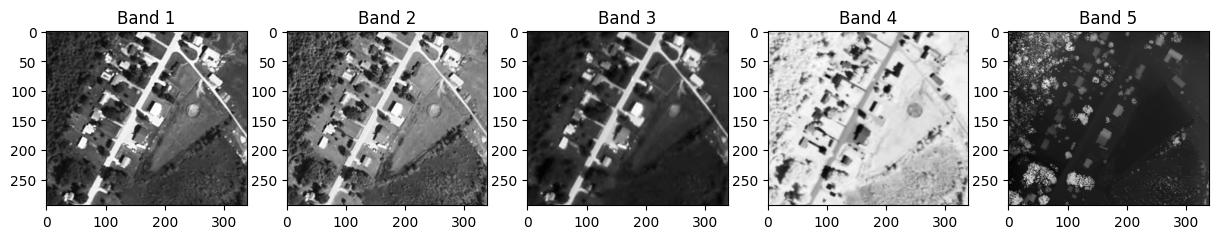

In [8]:

# Visualize each band separately
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed

# Plot each band
for i in range(stacked.shape[-1]):
    plt.subplot(1, stacked.shape[-1], i + 1)
    plt.imshow(stacked[:, :, i], cmap='gray')
    plt.title(f'Band {i+1}')

plt.show()


In [14]:
# scale image values from 0.0 - 1.0
#img = exposure.rescale_intensity(stacked)

# do segmentation multiple options with quickshift and slic
seg_start = time.time()
# segments = quickshift(img, convert2lab=False)
segments = quickshift(stacked, ratio=0.8, convert2lab=False)
# segments = quickshift(img, ratio=0.99, max_dist=5, convert2lab=False)
#segments = slic(img, n_segments=100000, compactness=0.1)
# segments = slic(img, n_segments=500000, compactness=0.01)
# segments = slic(img, n_segments=500000, compactness=0.1)
print('segments complete', time.time() - seg_start)

# save segments to raster
segments_fn = 'Outputs/segments.tif'
segments_ds = driverTiff.Create(segments_fn, sat_src.width, sat_src.height, 1, gdal.GDT_Float32)
geotransform = sat_src.transform.to_gdal()
segments_ds.SetGeoTransform(geotransform)
segments_ds.SetProjection(sat_src.crs.wkt)
segments_ds.GetRasterBand(1).WriteArray(segments)
segments_ds = None

segments complete 1.8206963539123535


In [10]:
segments = quickshift(img, convert2lab=False)